In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import math
import statsmodels.api as sm
from sklearn import tree


In [204]:
df = pd.read_csv("YourCabs_training.csv")
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [205]:
# checking for duplicate data, if any
df[df.duplicated()].count()

id                     0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
to_area_id             0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [206]:
# removing the duplicate entries
df.drop_duplicates(inplace=True)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [208]:
df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [209]:
df.drop(['id','user_id','package_id','to_area_id', 'from_city_id',    'to_city_id',    'to_date',       
'from_lat',    'from_long',    'to_lat',    'to_long'],inplace=True,axis=1)
df.head() #these columns are of no use for analysis

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,0
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,0
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,0
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,0
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,0


In [210]:
pd.crosstab(df.vehicle_model_id,df.Car_Cancellation) #make crosstable

Car_Cancellation,0,1
vehicle_model_id,,
1,2,0
10,104,0
12,29191,2668
13,6,1
14,1,0
17,40,0
23,297,0
24,1491,3
28,1626,76


In [211]:
df['vehicle_model_id'].corr(df['Car_Cancellation']) #no correlation so we can remove this column actually

-0.04524401339385632

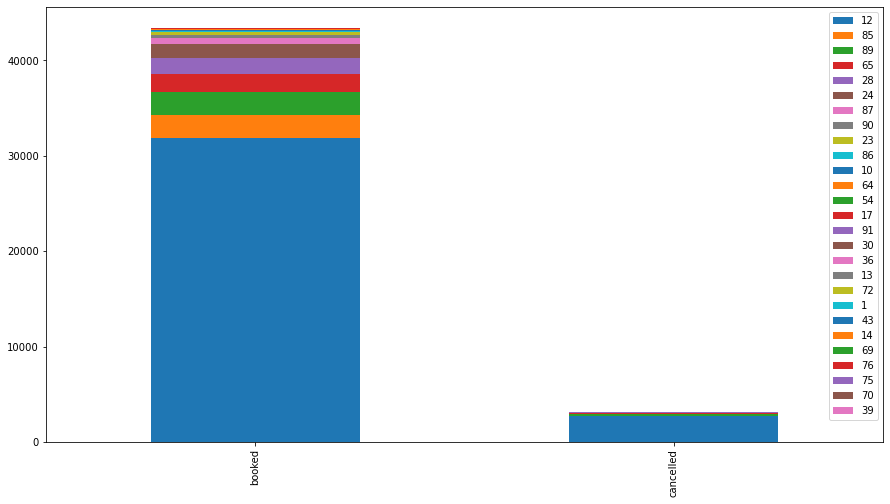

In [212]:
#this is the bar graph  for determining the cancelling & booked based on vehicle model id
all_bookings=df['vehicle_model_id'].value_counts()
cancelled=df[df['Car_Cancellation']==1]['vehicle_model_id'].value_counts()
qf=pd.DataFrame([all_bookings,cancelled])
qf.fillna(0,inplace=True)
qf.index=['booked','cancelled']
qf.plot(kind='bar',stacked=True,figsize=(15,8))
plt.show()

In [213]:
df.drop('vehicle_model_id',inplace=True,axis=1)#now i removed vehiclemodel id

In [214]:
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 0 to 43430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   Car_Cancellation     43431 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ MB


,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,0
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,0
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,0
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,0
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,0


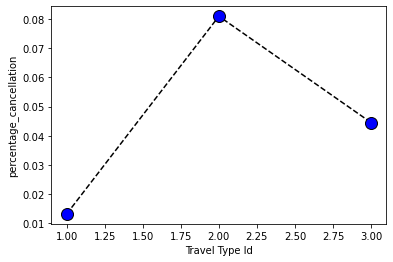

In [254]:
#here i checked percentage cancellation with type of travel id  givven
zc=pd.crosstab(df.travel_type_id,df.Car_Cancellation,normalize='index')
zc.columns=['not_cancelled','cancelled']
plt.plot(zc.index,zc['cancelled'],color='black', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.xlabel('Travel Type Id')
plt.ylabel('percentage_cancellation')
plt.show()

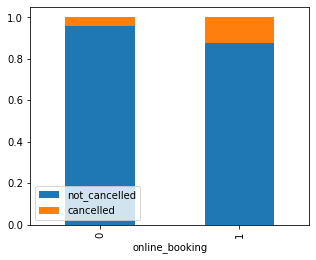

                not_cancelled  cancelled
online_booking                          
0                    0.956358   0.043642
1                    0.875377   0.124623


In [216]:
#i Analysed online_booking
ax=pd.crosstab(df.online_booking,df.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

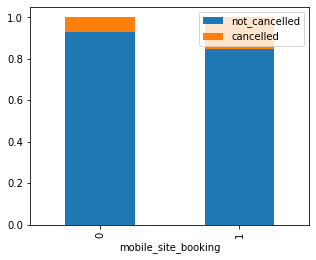

                     not_cancelled  cancelled
mobile_site_booking                          
0                         0.931581   0.068419
1                         0.846113   0.153887


In [217]:
#i Analysed mobile_site_booking with 
ax=pd.crosstab(df.mobile_site_booking,df.Car_Cancellation,normalize='index')
ax.columns=['not_cancelled','cancelled']
ax.plot(kind='bar',stacked=True,figsize=(5,4))

plt.show()
print(ax)

In [218]:
df.drop('from_area_id',inplace=True,axis=1)#remove column


In [219]:
df.drop('from_date',inplace=True,axis=1)#remove column
df.drop('booking_created',inplace=True,axis=1)#remove column

In [220]:
x=df.reset_index(drop='Car_Cancellation')
x

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation
0,2,0,0,0
1,2,0,0,0
2,2,0,0,0
3,2,0,0,0
4,2,0,0,0
...,...,...,...,...
43426,2,1,0,0
43427,2,1,0,0
43428,3,0,0,0
43429,2,0,0,0


In [221]:


x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   travel_type_id       43431 non-null  int64
 1   online_booking       43431 non-null  int64
 2   mobile_site_booking  43431 non-null  int64
 3   Car_Cancellation     43431 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


In [222]:
y=sx['Car_Cancellation']

In [ ]:
#applying different algorithms for prediction model

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [224]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(x_test)

In [225]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 1.0


In [240]:
x_test

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation
26610,3,0,0,0
38515,3,0,0,0
29806,3,0,1,1
28868,3,0,0,0
11163,2,1,0,0
...,...,...,...,...
28601,3,0,0,0
9853,3,0,0,0
25903,2,0,0,0
16962,2,0,0,0


In [241]:
y_test

26610    0
38515    0
29806    1
28868    0
11163    0
        ..
28601    0
9853     0
25903    0
16962    0
22005    0
Name: Car_Cancellation, Length: 13030, dtype: int64

In [242]:
x_train

,travel_type_id,online_booking,mobile_site_booking,Car_Cancellation
21506,2,0,0,0
12367,2,0,1,0
5983,2,0,0,0
18513,1,0,0,0
16033,2,1,0,0
...,...,...,...,...
7813,2,0,0,0
32511,3,1,0,0
5192,2,0,0,0
12172,2,1,0,0


In [244]:
y_train

21506    0
12367    0
5983     0
18513    0
16033    0
        ..
7813     0
32511    0
5192     0
12172    0
33003    0
Name: Car_Cancellation, Length: 30401, dtype: int64

In [245]:
Y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [246]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [247]:
y_predict=clf.predict(x_test)


from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
print(cnf_matrix)
print(clf.score(x_test,y_test))

# lets draw estimation curves

In [257]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

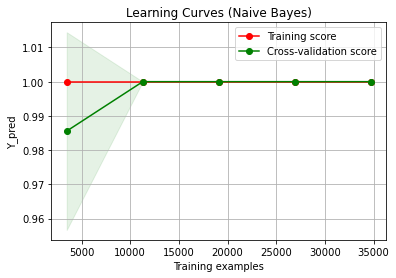

In [256]:
from sklearn.model_selection import learning_curve

estimator = GaussianNB()
title = "Learning Curves (Naive Bayes)"
plot_learning_curve(estimator,title,x,y)

plt.show()

In [251]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=50)

In [252]:
y_predict=neigh.predict(x)
cnf_matrix = confusion_matrix(y_test, Y_pred)
print(cnf_matrix)
print(neigh.score(x_test,y_test))


[[12098     0]
 [    0   932]]
0.9992325402916347


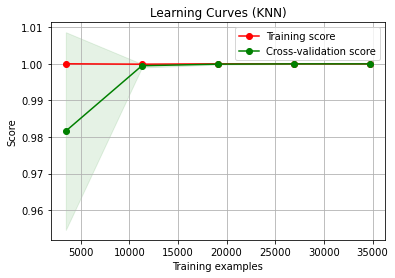

In [253]:
estimator = KNeighborsClassifier()
title = "Learning Curves (KNN)"
plot_learning_curve(estimator,title,x,y)
plt.show()
